In [1]:
from nmon import *

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py: 34

nmon [-2.51170831 -0.43719939  1.37808649  3.11307125  3.78873062  6.72997921]


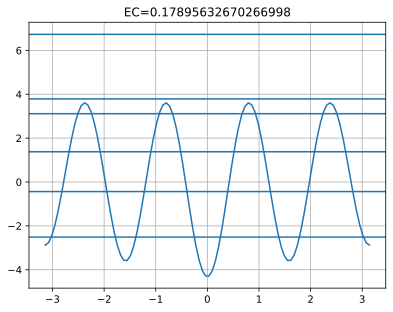

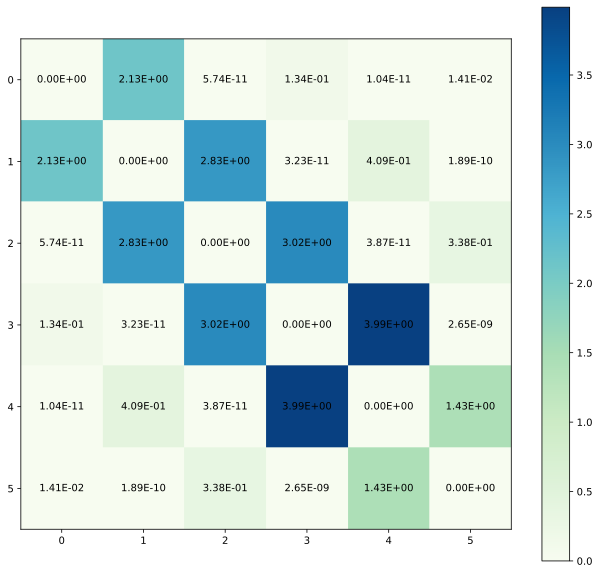

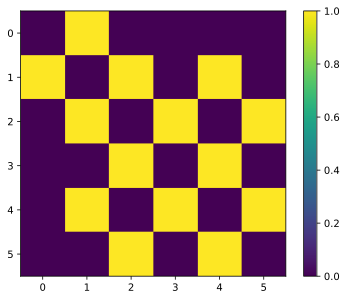

[2.0745089186242764, 1.815285875179376, 1.7349847621639616, 0.6756593734773508, 2.9412485866421987]


In [2]:
N = 1
M = 4
EC_shunt = 0.18 * 1

# choose sparse: 100/100, 100/10, 100/5, 100/3
# choose dense: 100/2

# nmon = Nmon(N=N, M=M, EJN=100*EC_shunt, EJM=100*EC_shunt, EC_shunt=EC_shunt)
nmon = Nmon(N=N, M=M, EJN=20*EC_shunt, EJM=1*EC_shunt, EC_shunt=EC_shunt)

nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0, 0, 0], num_levels=6, make_plot=True, just_H=False, cutoff=4)#compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))

print(nmon.transition_freqs)

In [3]:
hamiltonian_matrix = nmon.H_arr

In [4]:
sparse_matrix = scipy.sparse.csr_matrix(np.round(hamiltonian_matrix,4))
eval_full, evec_full = spla.eigsh(sparse_matrix, which='SA', k=6)

In [5]:
eval_full

array([-2.51170831, -0.43719939,  1.37808649,  3.11307125,  3.78873062,
        6.72997921])

In [6]:
main_diag = np.diag(hamiltonian_matrix, k=0)
sub_diag = np.diag(hamiltonian_matrix, k=-1)

H_min_V = np.diag(main_diag, k=0) + np.diag(sub_diag, k=+1) + np.diag(sub_diag, k=-1)

# H_min_V = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2, n_g3, coupling_coef=0)

In [7]:
eval, psi0 = eigh_tridiagonal(main_diag, sub_diag)

In [8]:
psi0_dag = np.conjugate(psi0).T

In [9]:
V = hamiltonian_matrix - H_min_V
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
H_min_V_tilde = np.round(psi0_dag @ H_min_V @ psi0, 4)

In [11]:
V_tilde = np.round(psi0_dag @ V @ psi0, 4)

In [12]:
# eval_final, psi0_final = compute_eigh(H_min_V_tilde + V_tilde)
sparse_matrix = scipy.sparse.csr_matrix(H_min_V_tilde + V_tilde)
eval_final, evec_final = spla.eigsh(sparse_matrix, which='SA', k=6)

In [13]:
eval_final

array([-2.51171152, -0.43720924,  1.37809005,  3.1130666 ,  3.78872418,
        6.7299677 ])

In [14]:
# Calculate sparsity level
sparse_matrix = scipy.sparse.csr_matrix(np.round(hamiltonian_matrix, 4))

total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]  # Total number of elements in the matrix
non_zero_elements = sparse_matrix.nnz  # Number of non-zero elements
sparsity_level = 1 - (non_zero_elements / total_elements)  # Fraction of zero elements

print(f"Sparsity level: {sparsity_level:.6f}")

Sparsity level: 0.998583


In [16]:
# Calculate sparsity level
sparse_matrix = scipy.sparse.csr_matrix(np.round(H_min_V_tilde + V_tilde, 4))

total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]  # Total number of elements in the matrix
non_zero_elements = sparse_matrix.nnz  # Number of non-zero elements
sparsity_level = 1 - (non_zero_elements / total_elements)  # Fraction of zero elements

print(f"Sparsity level: {sparsity_level:.6f}")

Sparsity level: 0.998828
